
# Project: Investigate a Dataset No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I've selected the No Show appointment from the Brazilian Healthcare program. The database contains more than 100k patients appointments infomation between may a june from 2016. 
I'm interested in people behavior, what factors are important in order to predict if someone will show up or not. Are differences in the age group or health condition? Also the time gap between the schedule and the appoinment date.


In [427]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [428]:
df = pd.read_csv('C:\\Users\\joqui\\Documents\\udacity\\noshowappointments-kagglev2-may-2016.csv', delimiter=',')
pd.options.display.float_format = '{:20,.0f}'.format
pd.set_option('display.float_format', str)

We load the file, see how the data is displayed and the dimensions of the database.

In [429]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [430]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2572134369293.0,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735.0,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893.0,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557.0,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127.0,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [431]:
df.shape

(110527, 14)

We check data types and NaN values of each variable. We detect some problems with PatientId, AppointmentID, and Dates. 
No missing values in this dataset.

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It's important to notice that there are unique appointments but not unique patients. So a patient can have multiple appointments. 

In [433]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Describe variables to watch for outliers.

In [434]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0
mean,147496265710392.38,5675305.123426855,37.08887421173107,0.09826558216544373,0.1972459218109602,0.07186479321794674,0.030399811810688793,0.022247957512643968,0.32102563174608917
std,256094920291738.88,71295.75153966916,23.110204963681948,0.29767475410942307,0.39792134994753325,0.2582650735076741,0.17168555541436223,0.1615427258143932,0.46687273170178245
min,39217.84439,5030230.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4172614444192.0,5640285.5,18.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,31731838713978.0,5680573.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,94391720898175.0,5725523.5,55.0,0.0,0.0,0.0,0.0,0.0,1.0
max,999981631772427.0,5790484.0,115.0,1.0,1.0,1.0,1.0,4.0,1.0


### Cleaning Operations

Change PatientId and AppointmentID type to Object


In [435]:
df['PatientId'] = df['PatientId'].astype(object) 
df['AppointmentID'] = df['AppointmentID'].astype(object) 
df.dtypes

PatientId         object
AppointmentID     object
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

Convert to date time the Scheduleday and Appointmentday

First we need to split the "T" character in the dates

In [436]:
df[["ScheduledDay2","ScheduledHour"]] = df.ScheduledDay.str.split("T",expand=True)


In [437]:
df[["AppointmentDay2","AppointmentHour"]] = df.AppointmentDay.str.split("T",expand=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay2,ScheduledHour,AppointmentDay2,AppointmentHour
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08Z,2016-04-29,00:00:00Z
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27Z,2016-04-29,00:00:00Z
2,4262962299951.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04Z,2016-04-29,00:00:00Z
3,867951213174.0,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31Z,2016-04-29,00:00:00Z
4,8841186448183.0,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23Z,2016-04-29,00:00:00Z


Now we convert to datetime

In [438]:
df['ScheduledDay2']=pd.to_datetime(df['ScheduledDay2'])
df['AppointmentDay2']=pd.to_datetime(df['AppointmentDay2'])
df.dtypes

PatientId                  object
AppointmentID              object
Gender                     object
ScheduledDay               object
AppointmentDay             object
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No-show                    object
ScheduledDay2      datetime64[ns]
ScheduledHour              object
AppointmentDay2    datetime64[ns]
AppointmentHour            object
dtype: object

Drop Ages less than 0. Only one PatientId with problems.

In [439]:
df = df.drop(df[df['PatientId']==465943158731293].index)

<a id='eda'></a>
## Exploratory Data Analysis


### How are distributed the variables in the dataset?

First, we are going to group by Patient (beacuse one patient can have more than 1 appointment) and see the basic health conditions in the group and their ages.

Also how many appointments receive the SMS and dates that they were schedule.

In [440]:
df_patient = df.groupby("PatientId").max()

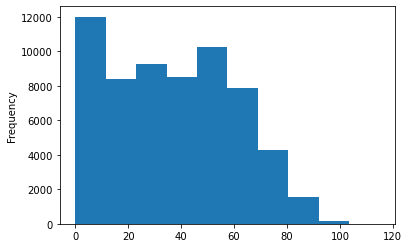

In [441]:
df_patient['Age'].plot(kind='hist');

In [446]:
df_patient.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,62298.0,62298.0,62298.0,62298.0,62298.0,62298.0,62298.0,62298.0
mean,5687423.284262737,36.72010337410511,0.09290827955953643,0.19650711098269608,0.07088510064528557,0.024174130790715592,0.020113005232912776,0.43529487302963177
std,71994.55824915762,23.531393470921355,0.29030619002029673,0.3973595359632998,0.25663487750495334,0.15359075771996514,0.1550576205765461,0.49579954857967434
min,5134197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5650119.25,17.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5695407.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5742084.25,56.0,0.0,0.0,0.0,0.0,0.0,1.0
max,5790484.0,115.0,1.0,1.0,1.0,1.0,4.0,1.0


How many patients have Hipertension?

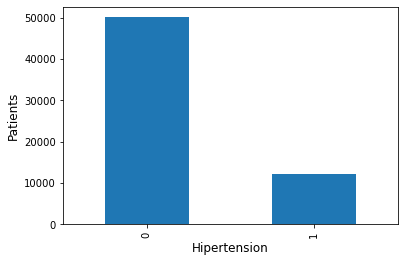

In [485]:
df_patient["Hipertension"].value_counts().plot(kind="bar")
plt.xlabel('Hipertension', size=12)
plt.ylabel('Patients', size = 12);

How many patients are Male (M) and Female (F)?

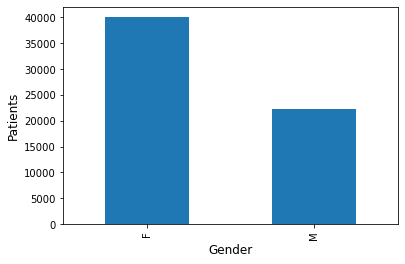

In [486]:
df_patient["Gender"].value_counts().plot(kind="bar")
plt.xlabel('Gender', size=12)
plt.ylabel('Patients', size = 12);

How many patients have Schorlarship?

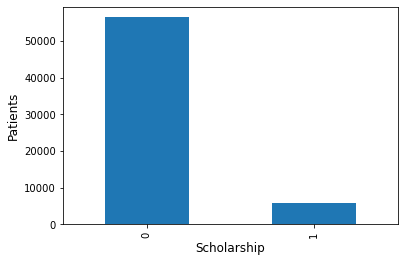

In [487]:
df_patient["Scholarship"].value_counts().plot(kind="bar")
plt.xlabel('Scholarship', size=12)
plt.ylabel('Patients', size = 12);

How many patients have diabetes?

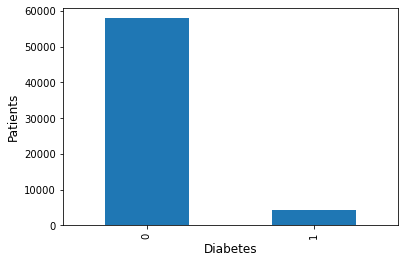

In [488]:
df_patient["Diabetes"].value_counts().plot(kind="bar")
plt.xlabel('Diabetes', size=12)
plt.ylabel('Patients', size = 12);

How Many Patients have Alcoholism?

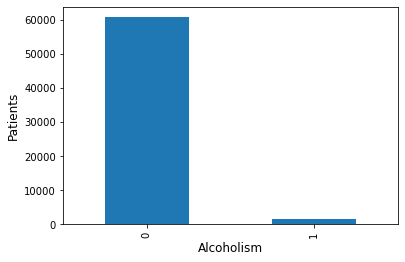

In [489]:
df_patient["Alcoholism"].value_counts().plot(kind="bar")
plt.xlabel('Alcoholism', size=12)
plt.ylabel('Patients', size = 12);

How are distributed the Handicap?

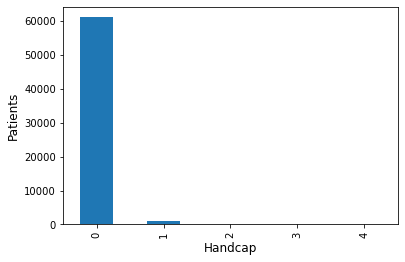

In [490]:
df_patient["Handcap"].value_counts().plot(kind="bar")
plt.xlabel('Handcap', size=12)
plt.ylabel('Patients', size = 12);

And for each appointment we see if they received the SMS and how many No Show there are.

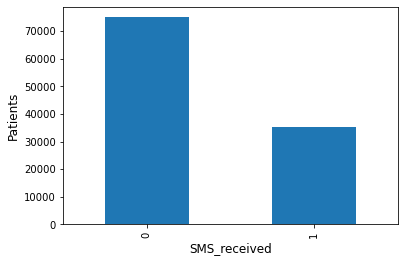

In [491]:
df["SMS_received"].value_counts().plot(kind="bar")
plt.xlabel('SMS_received', size=12)
plt.ylabel('Patients', size = 12);

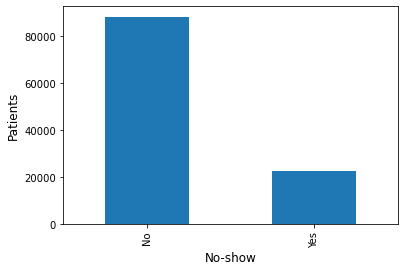

In [492]:
df["No-show"].value_counts().plot(kind="bar")
plt.xlabel('No-show', size=12)
plt.ylabel('Patients', size = 12);

In this first approach, we found that there are very young patients, the median is 36 years but with a high standard deviation. 25% are below 18 years old. This is important because in younger groups, the responsability of getting to the appointment maybe is not in their control, parents or people in charge are the ones to remind.

Then, there are some variables that maybe be irrelevant because all the patients concentrate in only one option. For example Diabetes, Handcap, Alcoholism and Scholarship.

Also, we found that nearly 30% of the appointments received and SMS and 20% of the total are NO Show.


### Which factors are important in order to predict if someone will show up or not?

We will see the relation netween No Show and the next Variables:
  Age,
  Schedule dates,
  SMS_received


#### Relationship between schedule date and No-Show.
We calculated the difference between Schedule date and appointment date. 

In [455]:
df['difference_in_days'] = (df['AppointmentDay2'] - df['ScheduledDay2']).dt.days

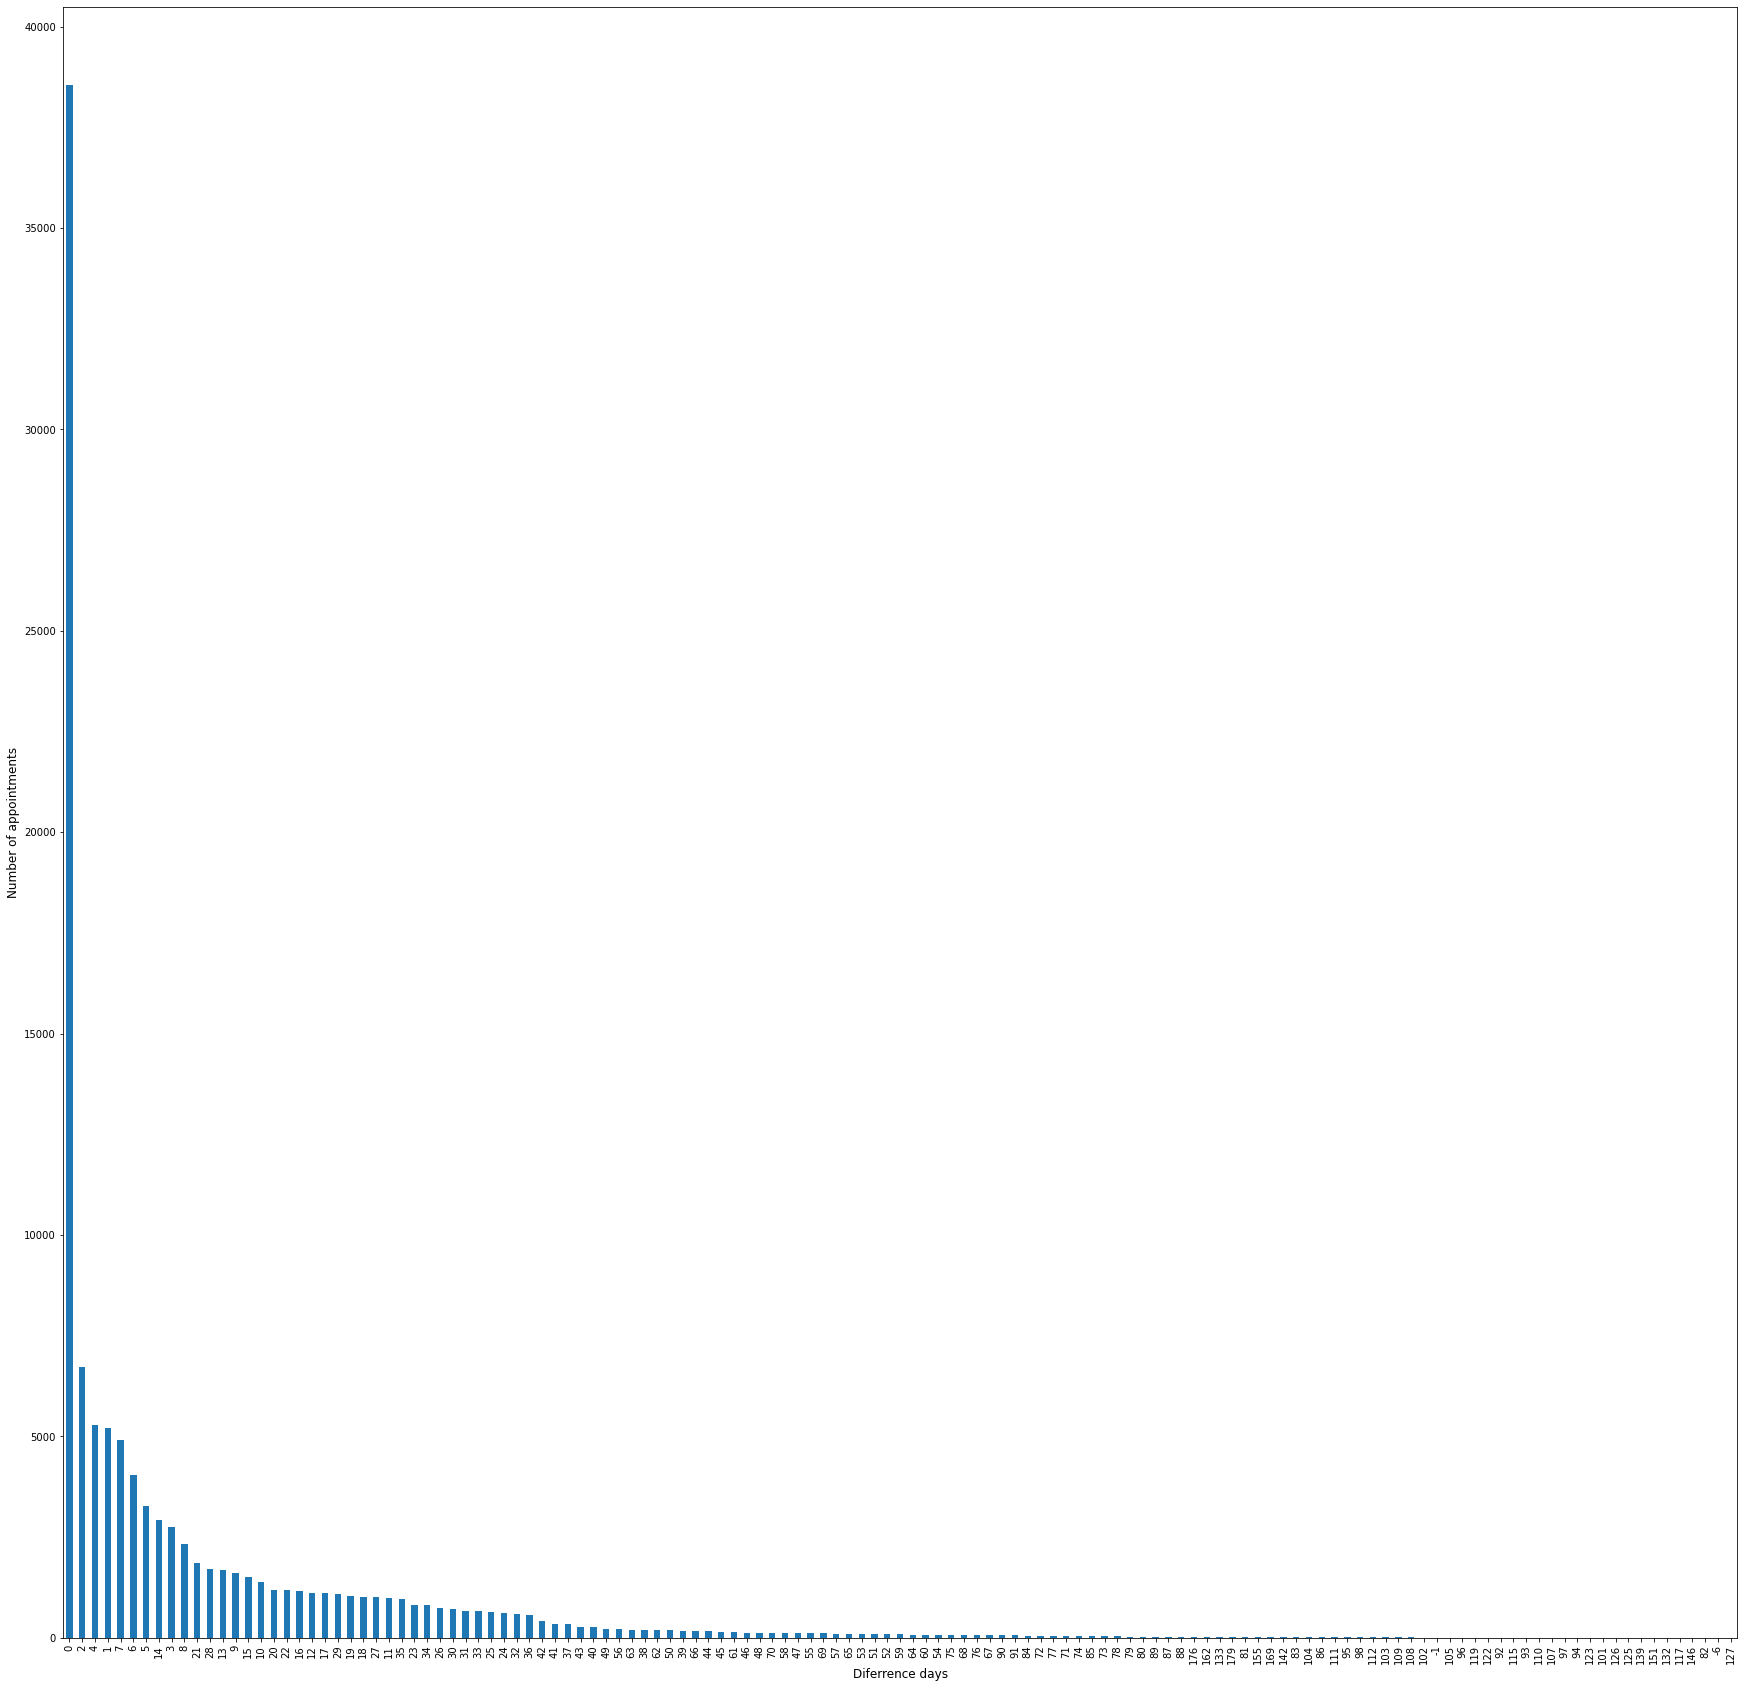

In [493]:
df["difference_in_days"].value_counts().plot(kind="bar", figsize=(30, 30))
plt.xlabel('Diferrence days', size=12)
plt.ylabel('Number of appointments', size = 12);

Now we use and Scatter plot to see the general differences with the groups No-Show (yes) and Show-up (no)

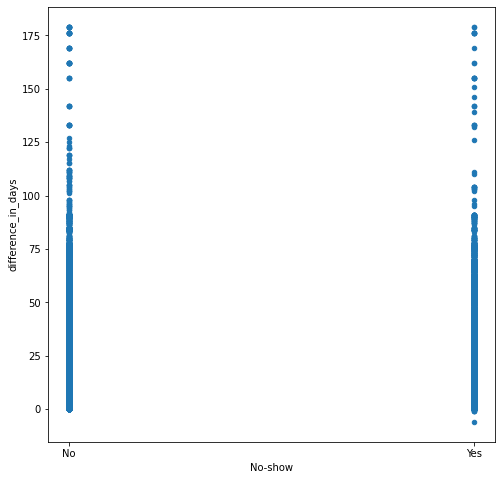

In [481]:
df.plot(x='No-show', y='difference_in_days', kind ='scatter', figsize = (8,8));

The majority of the appointments are made in the same day. There is one value that have a difference of days of -1. 
This is probably a system error.

We need to group to see more clearly the behavior.

In [476]:
diff_days_labels = pd.Series([
    'Same day',
    '1-2 days',
    '3-7 days',
    '8-31 days',
    '32+ days'
    ])
df['diff_days_labels'] = pd.cut(
    df.difference_in_days, bins = [-1, 0, 2, 7, 31, 999],
    labels = diff_days_labels,
    )

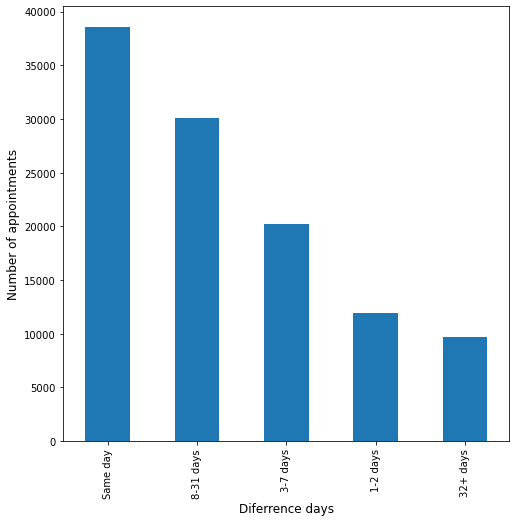

In [494]:
df["diff_days_labels"].value_counts().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Diferrence days', size=12)
plt.ylabel('Number of appointments', size = 12);

Now we need to see the difference between the No-Show (yes) and the ones that show up (no)

In [459]:
yes = df[df["No-show"]=="Yes"]

no = df[df["No-show"]=="No"]

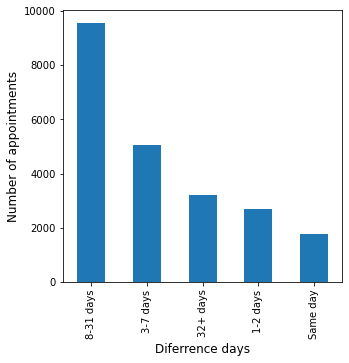

In [495]:
yes["diff_days_labels"].value_counts().plot(kind="bar", figsize=(5, 5))
plt.xlabel('Diferrence days', size=12)
plt.ylabel('Number of appointments', size = 12);

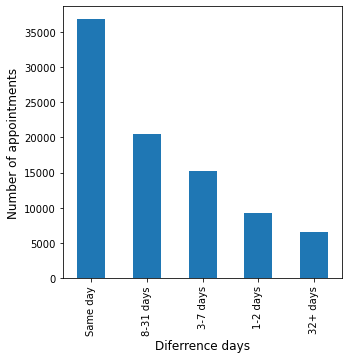

In [496]:
no["diff_days_labels"].value_counts().plot(kind="bar", figsize=(5, 5))
plt.xlabel('Diferrence days', size=12)
plt.ylabel('Number of appointments', size = 12);

We found that No-Show is influence by the difference of the day that they schedule and the appointment. The ones made in the same day, have more probabilities to show up.

#### Relationship between No Show and Age

We divided the data set between the ones that show up (no) and the No-Show (yes) and watch their distribution in the variable Age.

In [462]:
no["Age"].describe()

count              88207.0
mean    37.790504154999034
std     23.338645064053047
min                    0.0
25%                   18.0
50%                   38.0
75%                   56.0
max                  115.0
Name: Age, dtype: float64

In [463]:
yes["Age"].describe()

count              22319.0
mean     34.31766656212196
std     21.965940510824314
min                    0.0
25%                   16.0
50%                   33.0
75%                   51.0
max                  115.0
Name: Age, dtype: float64

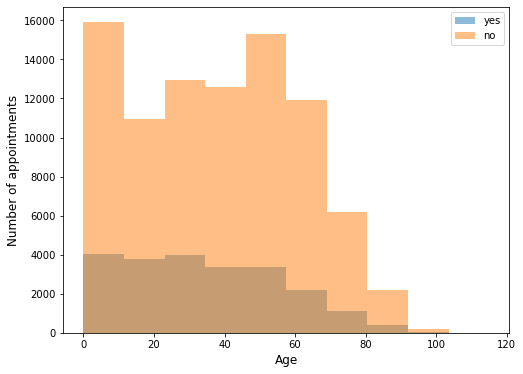

In [498]:
fig, ax=plt.subplots(figsize=(8,6));
ax.hist(yes['Age'],alpha=0.5, label='yes')
ax.hist(no['Age'],alpha=0.5, label='no')
ax.legend(loc='upper right')
plt.xlabel('Age', size=12)
plt.ylabel('Number of appointments', size = 12);

We found that there are specific groups that have more tendency to No-show. In overall, younger people have more No-show, but if we see the histrogram we found that are higher No show rates are near 20 and 30 years. 

#### Relation between SMS and No-Show

And finally, we want to analize if the SMS of remainder works or not.

In [465]:
yes["SMS_received"].mean()

0.43837089475334917

In [466]:
no["SMS_received"].mean()

0.29133742220005215

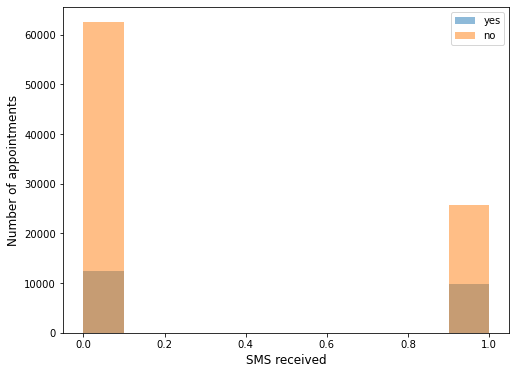

In [500]:
fig, ax=plt.subplots(figsize=(8,6));
ax.hist(yes['SMS_received'],alpha=0.5, label='yes')
ax.hist(no['SMS_received'],alpha=0.5, label='no')
ax.legend(loc='upper right')
plt.xlabel('SMS received', size=12)
plt.ylabel('Number of appointments', size = 12);

0.29133742220005215
0.43837089475334917


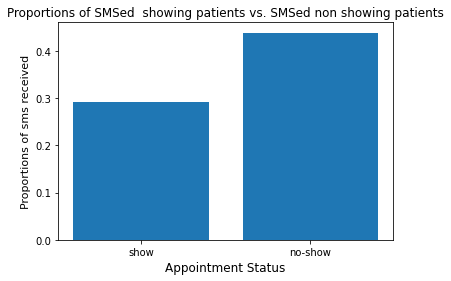

In [503]:
sms_prop_show = (no[no['SMS_received']==1]['Age'].count())/(no.shape[0])
print(sms_prop_show)
sms_prop_no_show= (yes[yes['SMS_received']==1]['Age'].count())/(yes.shape[0])
print(sms_prop_no_show)

plt.bar([1,2], [sms_prop_show,sms_prop_no_show ], tick_label=['show', 'no-show'])
plt.title('Proportions of SMSed  showing patients vs. SMSed non showing patients')
plt.xlabel('Appointment Status', size=12)
plt.ylabel('Proportions of sms received', size =11);


<a id='conclusions'></a>
## Conclusions

1. In this analysis we found that younger patients have more tendency to No Show, especially in the group between 18 and 30 years old. 

2. Also, the appointments that are made for the next week, have more people not showing up. If the appointment was done in the same day, they have better chances to show up.

3. An interesting finding, is that the SMS don't help to improve the No-Show rates, people that recieved the SMS have more No Shows that the ones that not recieved. Maybe we need to look closer the group that give their number and recieved the SMS, there could be another reasons to No Show.


#### Limitations of this analysis

Its important to say that this is a descriptive exploration of the dataset, we found some relations between variables and No-Show but this is not implies causality. This is not a inferential.

1. Most of the variables are categorical and boolean, which does not allow to high level statistical analysis like correlations.
2. There is a lack of infomation in some variables, for example in the SMS remainder the result is counter intuitive, we don't know what gruop of patients were targeted and more details.
